# Layout: using `layout` to arrange a set of plots

The simple addition of a `cow.patch(...)` object and a `cow.layout(...)` object allows for a range of different arrangements of plots. The below document enumerates a range of these approaches.

#### Connection to our `R` cousins

These approaches reflect similar arrangements that are seen in [`R`](https://www.r-project.org/) packages like [`gridExtra`](https://cran.r-project.org/web/packages/gridExtra/index.html)'s [`arrange.grid`](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html#basic-usage), [`cowplot`](https://wilkelab.org/cowplot/index.html)'s [`plot_grid`](https://wilkelab.org/cowplot/articles/plot_grid.html)  and [`patchwork`](https://patchwork.data-imaginist.com/)'s [`plot_layout`](https://patchwork.data-imaginist.com/articles/guides/layout.html).


#### Outline of examples

The below subsections lay out arrange of plots using just `cow.patch` and `cow.layout` in two **distinct** ways. The first captures a more straight forward, single step approach to defining the layout, whereas the later presents a way to define the arrangement of plots in a nested way which may align with work flows that are more interative in nature. This first way aligns with [`gridExtra`](https://cran.r-project.org/web/packages/gridExtra/index.html) philosophical approach more, whereas the second aligns with [`cowplot`](https://wilkelab.org/cowplot/index.html) development philosophy.

##### A note on image sizes

When we call the `.show()` function, the documentation representation of the slides scales the width of the `svg` object to be 100\% width of the document in it exceeds the size. This scaling won't happen if you run the code in a standard `jupyter notebook`[^2].

[^2]: On the flip side, if you want such things in your jupyter  notebooks you can change the `css` of your notebooks by injecting them with something like this:
    ```
    .output_svg > div {
        max-width:100% !important; 
    }
    ```
    
    One way to do this would be to create a code block in each notebook and put something like the following in it (note that we didn't have the idea first, we just can't find the reference...).
    
    ```
    %%html
    <style>
    .output_svg > div {
        max-width:100% !important; 
    }
    </style>
    ```

## Initial definition of plots

In [1]:
import numpy as np
import cowpatch as cow

import plotnine as p9
import plotnine.data as p9_data

In [2]:
mtcars = p9_data.mpg

g0 = p9.ggplot(p9_data.mpg) +\
    p9.geom_bar(p9.aes(x="hwy")) +\
    p9.labs(title = 'Plot 0')

g1 = p9.ggplot(p9_data.mpg) +\
    p9.geom_point(p9.aes(x="hwy", y = "displ")) +\
    p9.labs(title = 'Plot 1')

g2 = p9.ggplot(p9_data.mpg) +\
    p9.geom_point(p9.aes(x="hwy", y = "displ", color="class")) +\
    p9.labs(title = 'Plot 2')

g3 = p9.ggplot(p9_data.mpg[p9_data.mpg["class"].isin(["compact",
                                                     "suv",
                                                     "pickup"])]) +\
    p9.geom_histogram(p9.aes(x="hwy"),bins=10) +\
    p9.facet_wrap("class")

## Layout of multiple plots

The examples below utilize a single `cow.patch(...)` and `cow.layout(...)` object to create complex arangements of figures.

### Design matrix approach

One way to define the layout of different plots on the same level is thorugh a `design` matrix. Without specification of the relative heights and widths of each row or column they are assumed to be equivalent[^1].

[^1]: The equal sizing for each block is within dimensions not across dimensions. That is, each row is not necessarily the same height as the width of each column. 

**Note** that the values in the `design` matrix must be from `0` to the number of objects in the arrangement.

In [3]:
patch_obj = cow.patch(g0,g1,g2)
layout_obj = cow.layout(design = np.array([[0,0,0,1,1,1],
                                           [0,0,0,2,2,2],
                                           [0,0,0,2,2,2]]))

The above `patch_obj` could also have been defined using a list of plots, which could be useful if the number of plots you plan to use might depend on certain decisions or you wish to store the plots you'd like to arrange in a list. 
```python
patch_obj = cow.patch(grobs = [g0,g1,g2])
```

We can then visual the arrangement or patchwork of these plots with the above layout in the following manner:


/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 11 x 6.5 inch image.


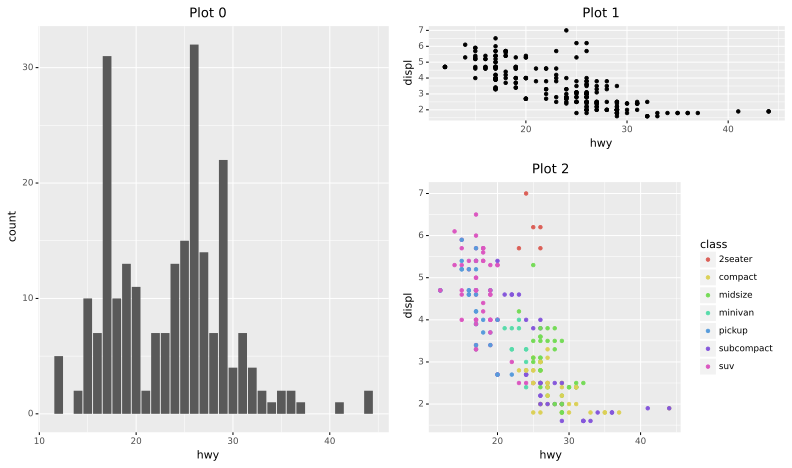

In [4]:
vis = patch_obj + layout_obj
vis.show(width = 12, height = 7)

#### Direct expression of relative matrix row heights and column widths

A similar arrangement as seen above can be described with the `rel_heights` structure in combination of a smaller `design` matrix.

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


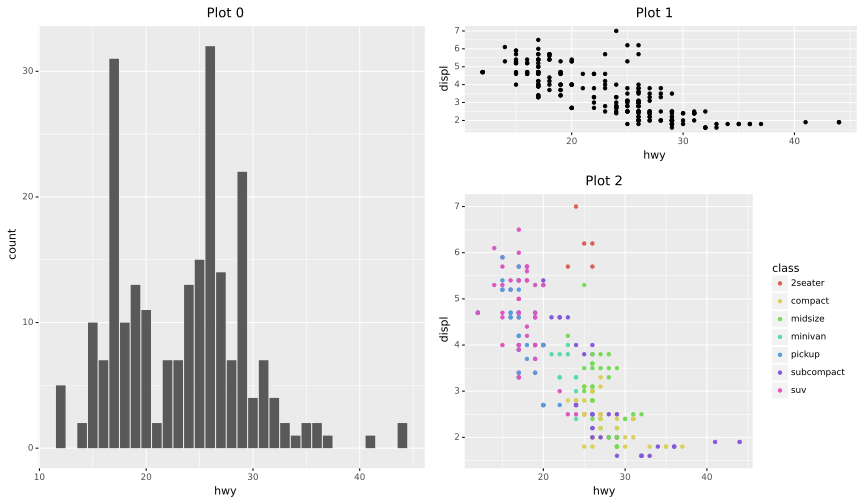

In [6]:
layout_obj_rh = cow.layout(design = np.array([[0,1],
                                              [0,2]]),
                                 rel_heights = [1,2])
vis_rh = patch_obj + layout_obj_rh
vis_rh.show(width = 12, height = 7)

### Design string approach

Very similar to the `design` matrix approach, the user is also welcome to describe the `design` with a string. 

**Note** that in the string format, one can use "\n" characters instead of a block string, and the values need to be capital letters (starting with "A").

The following example captures the same structure of the previous example using a `design` string:

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


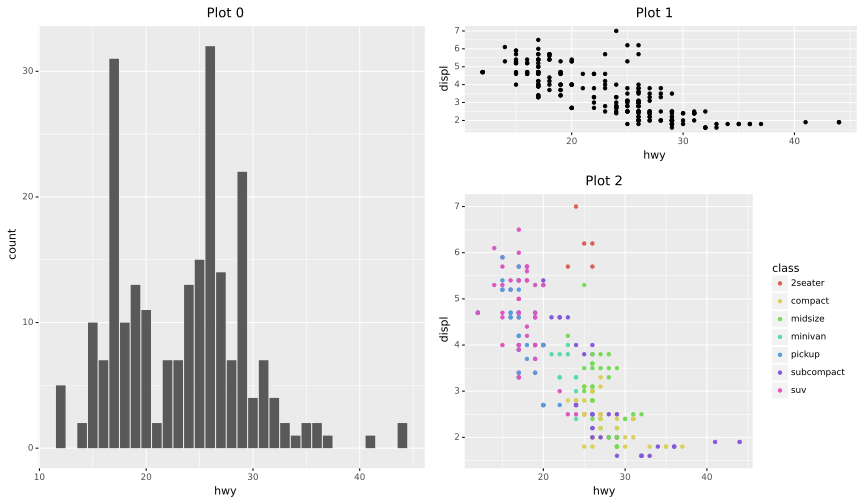

In [7]:
layout_obj_str = cow.layout(design = """
                                    AAABBB
                                    AAACCC
                                    AAACCC
                                    """)
vis_str = patch_obj + layout_obj_str
vis_str.show(width = 12, height = 7)

#### Direct expression of relative matrix row heights and column widths

In a similar manner as with the `design` matrix, a `design` string's row heights and column heights and be altered with `rel_widths` and `rel_heights`. This is demonstrated again in the example below:

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


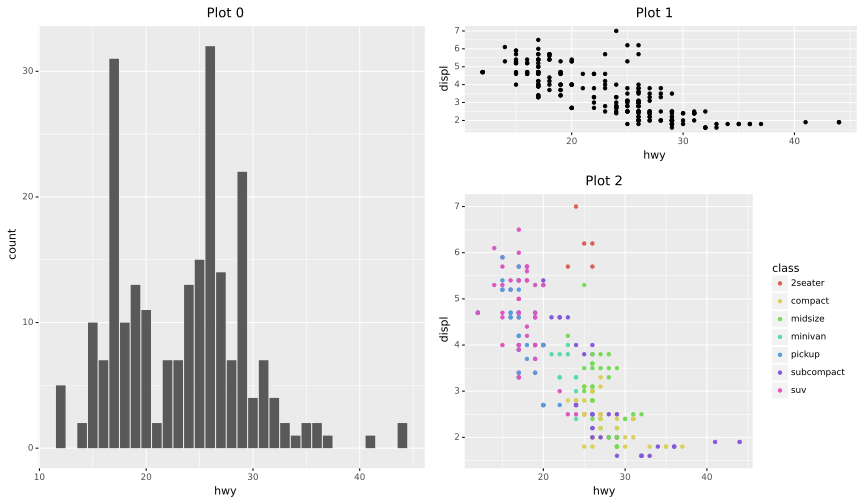

In [8]:
layout_obj_str_rh = cow.layout(design = """
                                        AB
                                        AC
                                        """,
                                 rel_heights = [1,2])
vis_str_rh = patch_obj + layout_obj_str_rh
vis_str_rh.show(width = 12, height = 7)

### Empty space in design layouts

In this `design` layout approach we can also define empty space. To do so, with a `design` **matrix** we include `np.nan` values to denote locations without associated plots and with a `design` **string** we denote these empty spaces with either "`#`" or "`.`"s. 

Below we present examples of all these approaches.

#### Empty space with a `design` matrix

[[ 0. nan  1.  1.]
 [ 0.  2.  2. nan]]


/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 14 x 9 inch image.


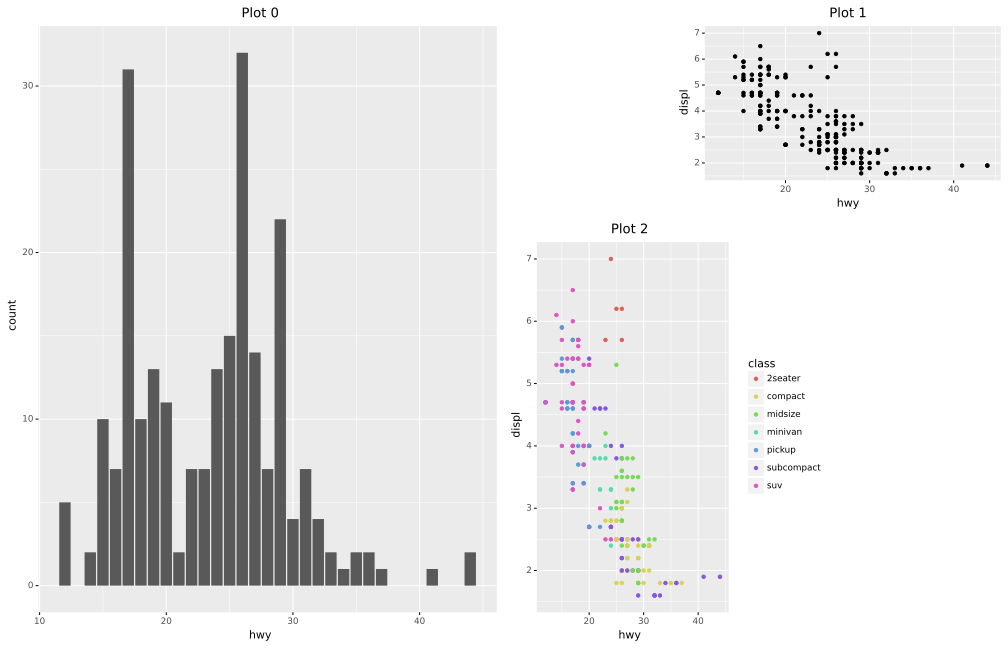

In [9]:
layout_obj_str_rh_nan = cow.layout(design = np.array([[0,np.nan,1,1],
                                                      [0,2,2,np.nan]]),
                                 rel_heights = [1,2],
                                 rel_widths = [3,1,1,1])
vis_str_rh_nan = patch_obj + layout_obj_str_rh_nan


print(np.array([[0,np.nan,1,1],
                [0,2,2,np.nan]]))
vis_str_rh_nan.show(width = 14, height = 9)

#### Empty space with a `design` string 

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 14 x 9 inch image.


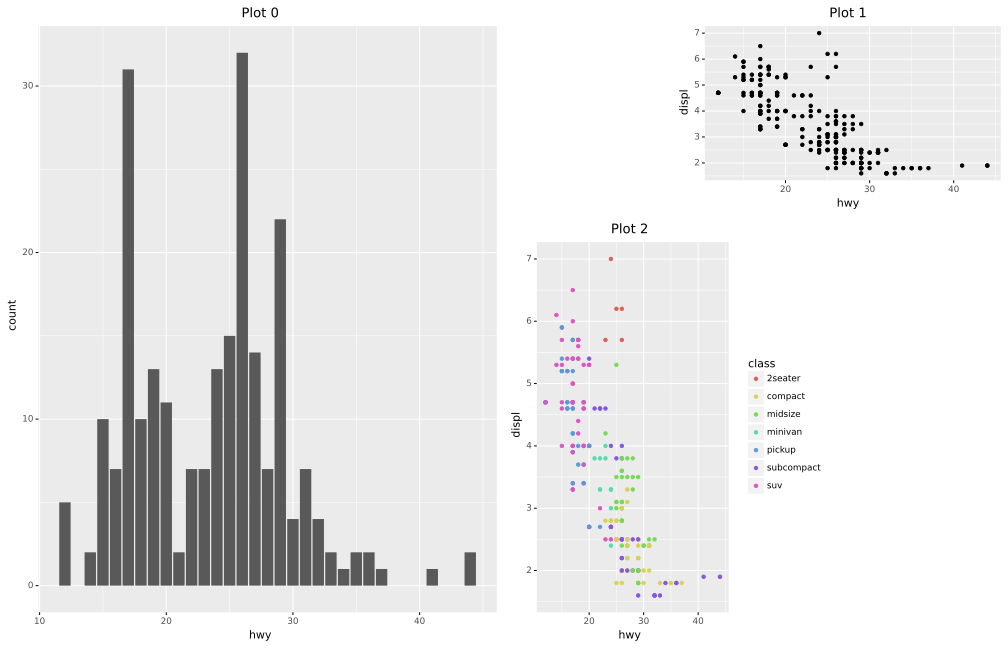

In [10]:
layout_obj_str_rh_hash = cow.layout(design = """
                                        A#BB
                                        ACC#
                                        """,
                                 rel_heights = [1,2],
                                 rel_widths = [3,1,1,1])
vis_str_rh_hash = patch_obj + layout_obj_str_rh_hash
vis_str_rh_hash.show(width = 14, height = 9)

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 14 x 9 inch image.


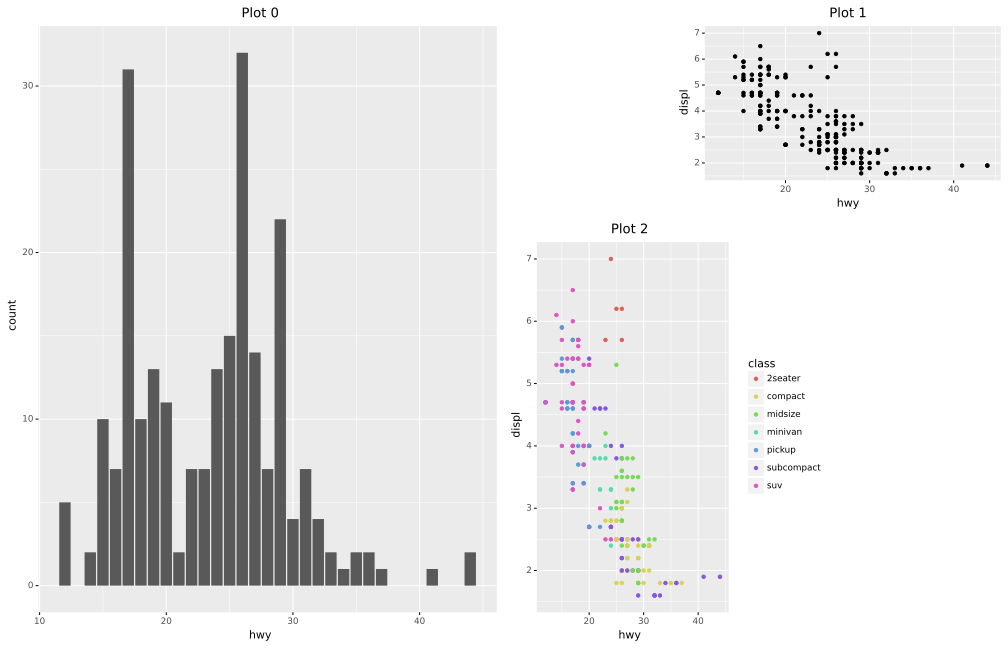

In [11]:
layout_obj_str_rh_dot = cow.layout(design = """
                                        A.BB
                                        ACC.
                                        """,
                                 rel_heights = [1,2],
                                 rel_widths = [3,1,1,1])
vis_str_rh_dot = patch_obj + layout_obj_str_rh_dot
vis_str_rh_dot.show(width = 14, height = 9)

### Layouts defined by number of columns and/or rows (`ncol` and `nrow`)

Sometimes `design` matrices are overkill, and in many other plot and arrangement tools, we often see arrangement descriptions define the number of rows and/or columns (`nrow`, `ncol`). Like these approaches, `cow.layout`'s `nrow` and `ncol` define the number of rows and columns of the layout. By default the plots in the `cow.patch` are then filled in by row (alterable with the `byrow` parameter). Below we present a sequence of examples that explore the potential layouts that can be defined with these parameters. 

#### Using both `ncol` and `nrow`

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


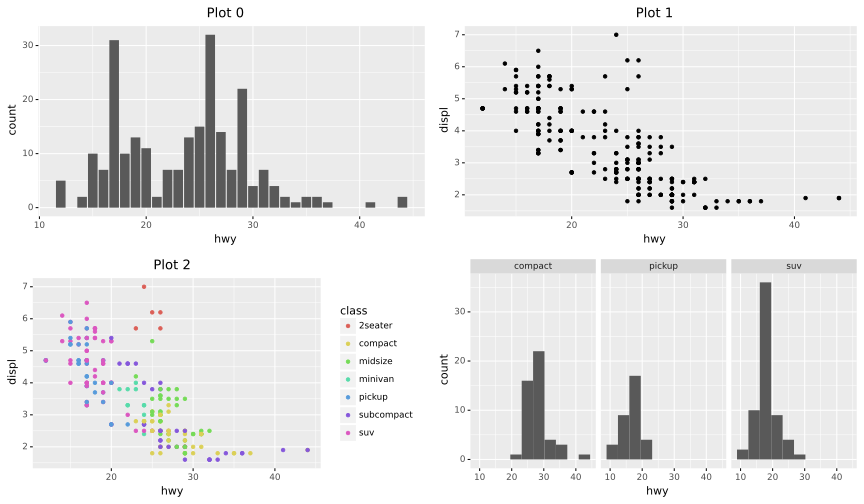

In [13]:
vis_ncol_nrow = cow.patch(g0,g1,g2,g3) + cow.layout(ncol = 2, nrow = 2)
vis_ncol_nrow.show(width = 12, height = 7)

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 14 x 7 inch image.


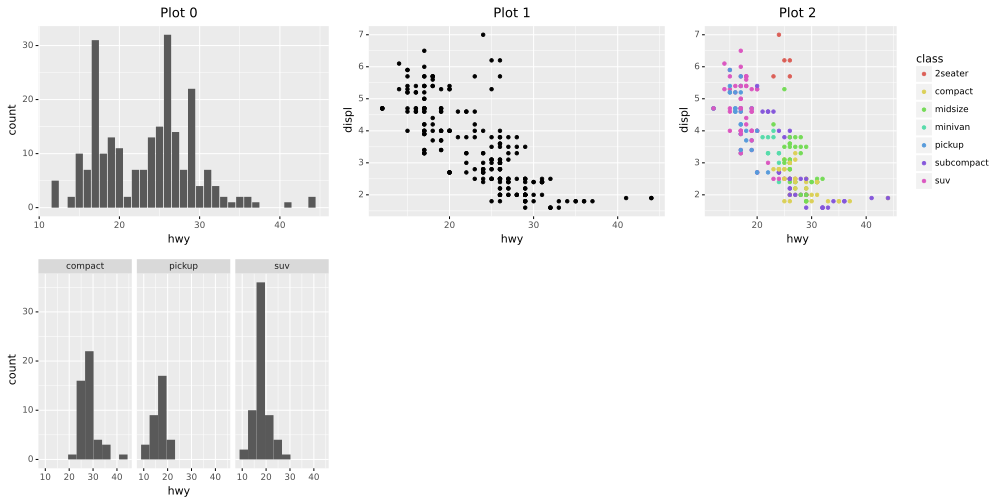

In [14]:
vis_ncol_nrow_over = cow.patch(g0,g1,g2,g3) + cow.layout(ncol = 3, nrow = 2)
vis_ncol_nrow_over.show(width = 14, height = 7)

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 14 x 11 inch image.


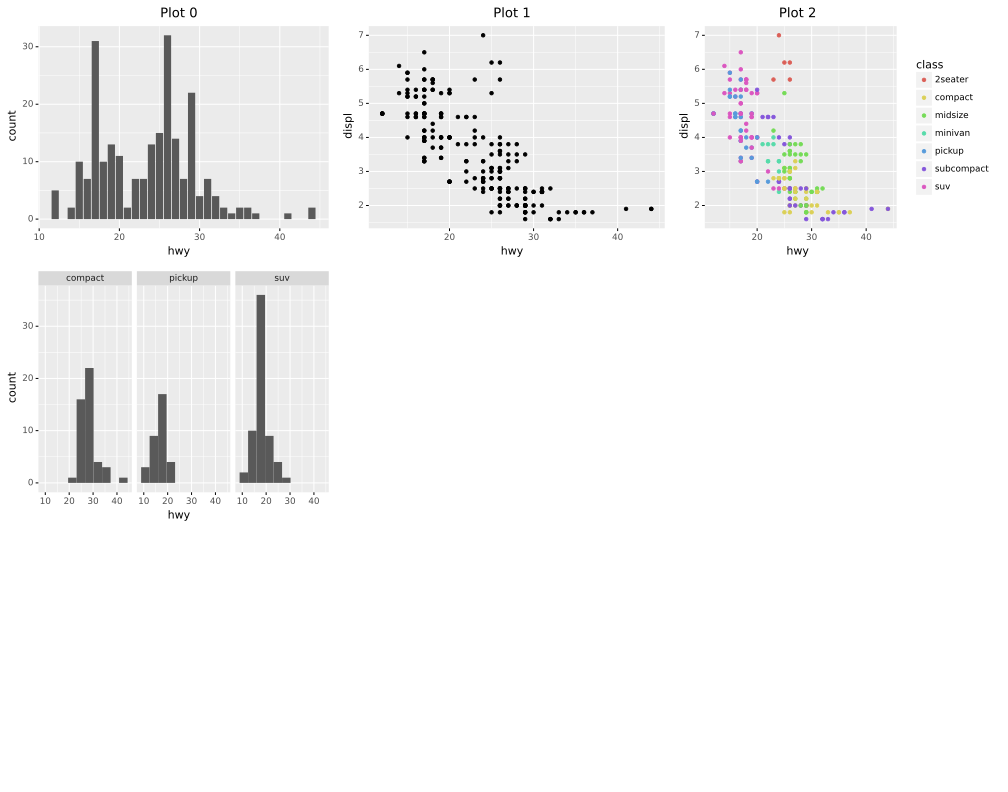

In [15]:
vis_ncol_nrow_X_over = cow.patch(g0,g1,g2,g3) + cow.layout(ncol = 3, nrow = 3)
vis_ncol_nrow_X_over.show(width = 14, height = 11)

#### Using only `ncol`

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


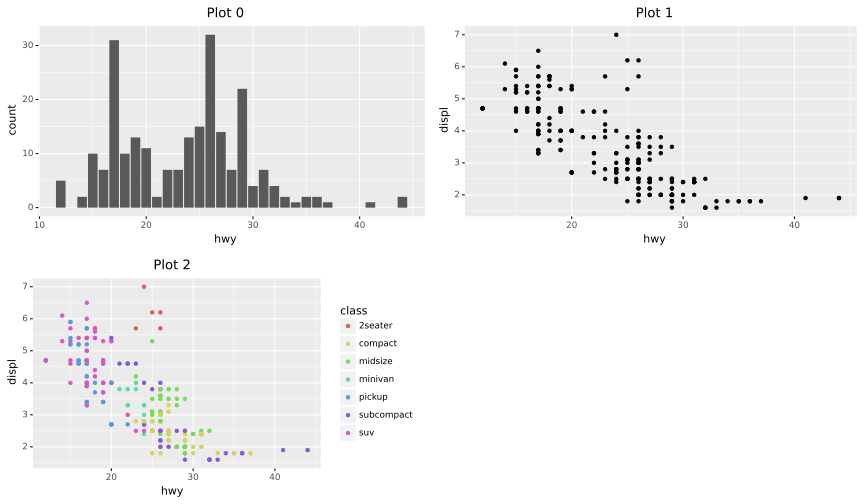

In [16]:
vis_ncol = cow.patch(g0,g1,g2) + cow.layout(ncol = 2)
vis_ncol.show(width = 12, height = 7)

###### Using only `ncol` with `byrow = False`

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


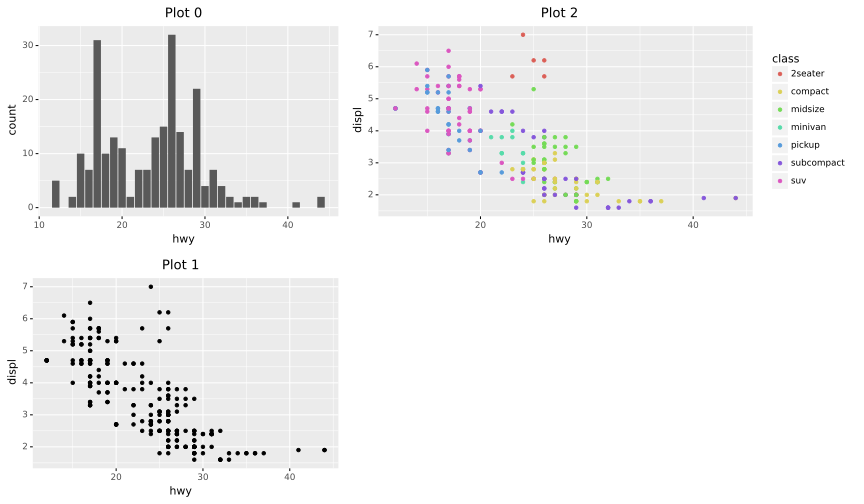

In [17]:
vis_ncol_bycol = cow.patch(g0,g1,g2) + cow.layout(ncol = 2, byrow = False, rel_widths = [2,3])
vis_ncol_bycol.show(width = 12, height = 7)

#### Using only `nrow`

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 11 inch image.


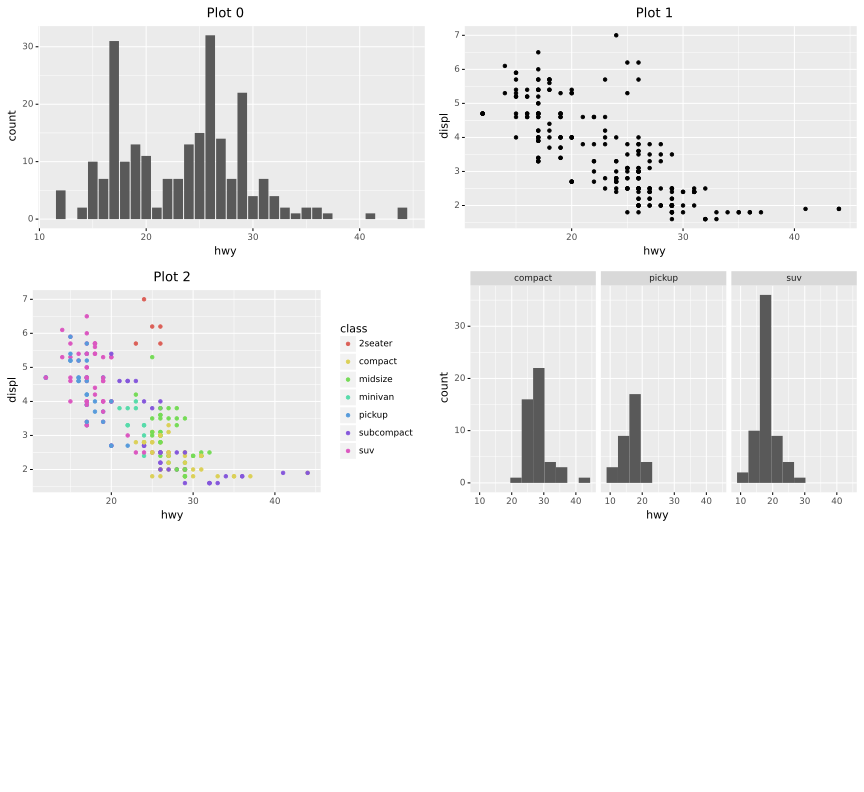

In [18]:
vis_ncol = cow.patch(g0,g1,g2,g3) + cow.layout(nrow = 3)
vis_ncol.show(width = 12, height = 11)

##### Using only `nrow` with `byrow=False`

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 11 inch image.


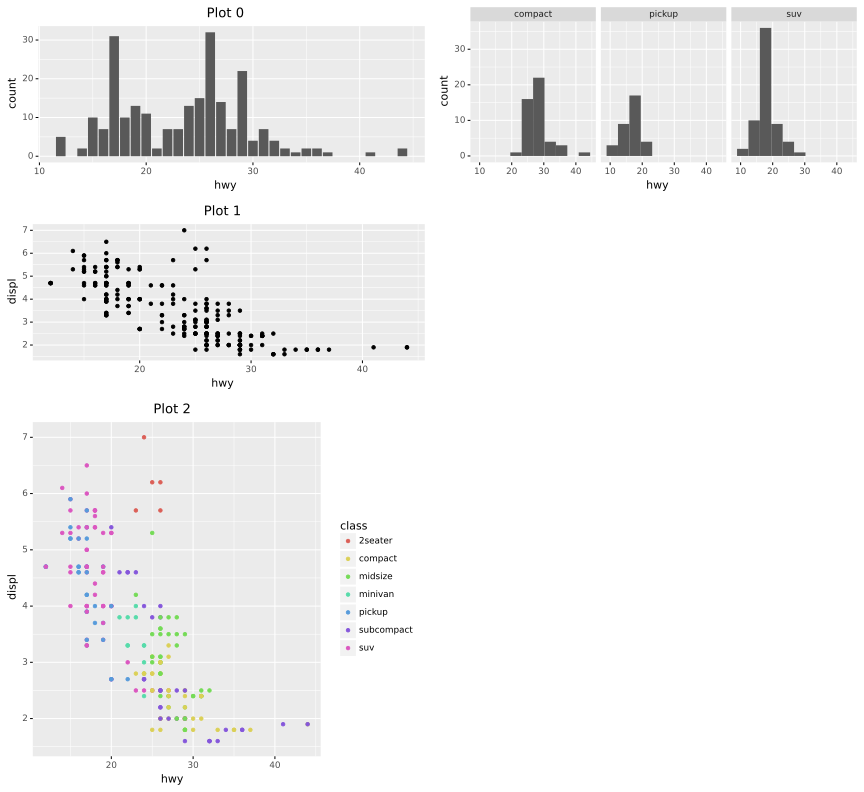

In [19]:
vis_ncol = cow.patch(g0,g1,g2,g3) + cow.layout(nrow = 3, byrow=False, rel_heights = [1,1,2])
vis_ncol.show(width = 12, height = 11)

## Nesting arrangement of plots

As mentioned above, it maybe more intuitive in certain situations and also work better in certain workflows to define the arrangement of plots by nesting sub-arrangements of plots. In the following we show how one can include an arrangement as a single object in another larger arrangement and visualized as follows. We only demonstrate a single layout of nesting, but naturally more one can leverage nesting in with more levels.

**Note** that we decide to use the `cow.layout`'s `nrow` and `ncol` parameters for simplicity, but `design` approaches would naturally preform well here too.

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


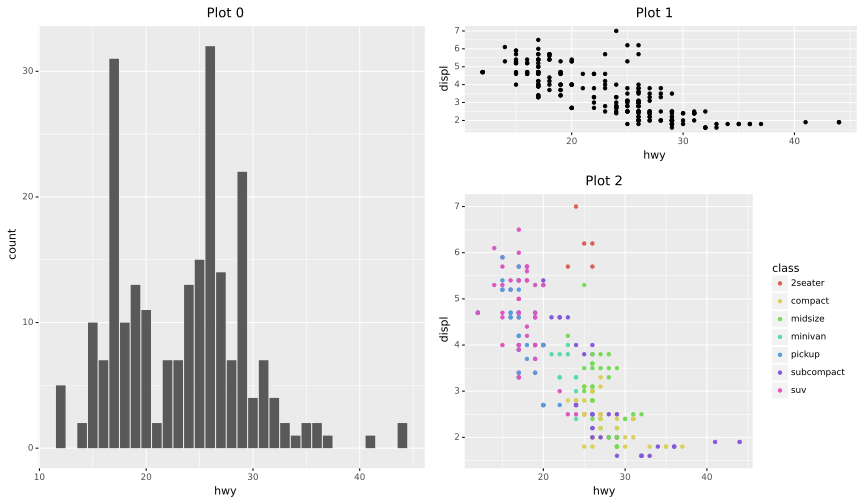

In [20]:
vis_left = cow.patch(g1,g2) + cow.layout(ncol =1, rel_heights = [1,2])

vis_total = cow.patch(g0, vis_left) + cow.layout(nrow = 1)
vis_total.show(width = 12, height = 7)

### with `grobs` parameter

It seems important enough to highlight that this approach might be cleanly approach with a list approach in `cow.patch`. Remember this can also be done with the `grobs` parameter as introduced at the beginning of this document. For example:

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 7 inch image.


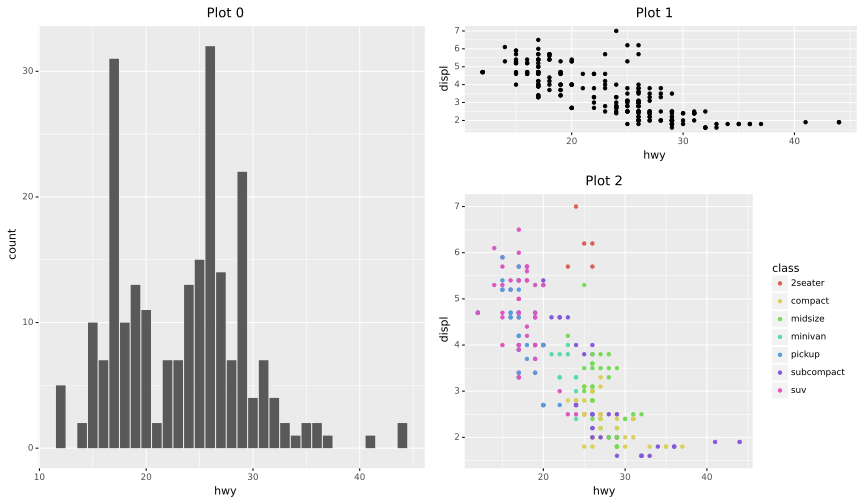

In [21]:
vis_total_g = cow.patch(grobs = [g0, vis_left]) + cow.layout(nrow = 1)
vis_total_g.show(width = 12, height = 7)

## Defaults and error avoidance corrections

In the above examples you'll see that we provided user defined `width` and `height` values for the `.show` call. And you'll find that a similar approach is done with `.save` class method. 

Underneath the hood of `cowpatch` we've provided a few useful additions in this area
1. If you're in a hurry and just want to see the plot you can call `.show()`. We'll select a decent `height` and `width`. This approach can also help you as a starting point (so you can fine tune the parameters after you see the underlying plot without your guidance on the sizing). 
2. There are underlying complications with `plotnine`'s ability to actually create a plot any size you'd like. If your requested `width` and `height` parameters run into this error (for example requesting a overall graphic size too small), we'll propose a different set of parameter values (with the same aspect ratio, and `width` and `height` values as close to your requested ones as possible).

### Example of selection of `height` and `width` if not provided

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 12 x 9.3 inch image.


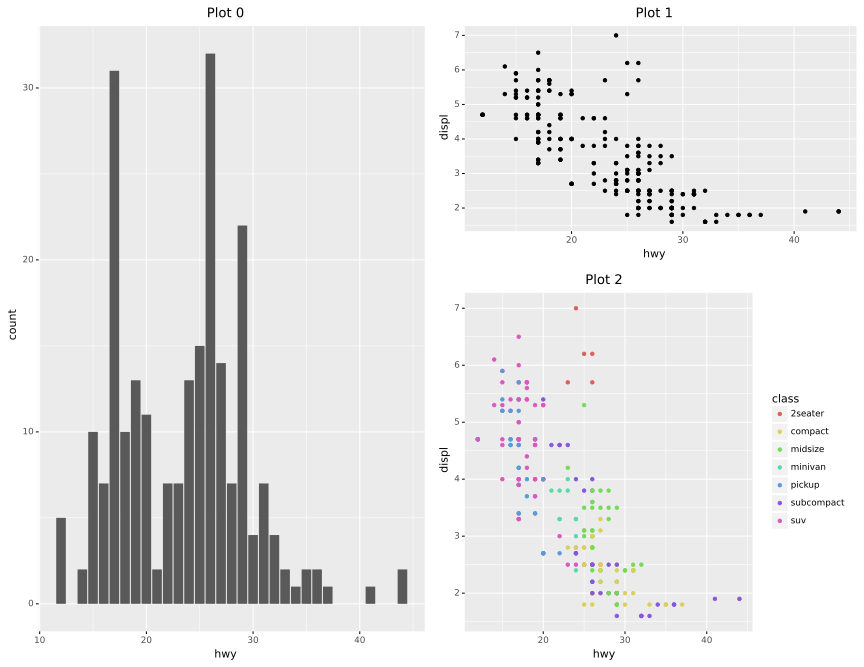

In [22]:
vis_left = cow.patch(g1,g2) + cow.layout(ncol =1, rel_heights = [2,3])
vis_total = cow.patch(g0, vis_left) + cow.layout(nrow = 1)

vis_total.show()

### Example of size correction if `height` and `width` don't work with `plotnine`'s visualization ability

/Users/benjaminleroy/Documents/CMU/research/cowpatch/src/cowpatch/svg_utils.py:438: CowpatchWarning: Showing 5.5 x 4.1 inch image.


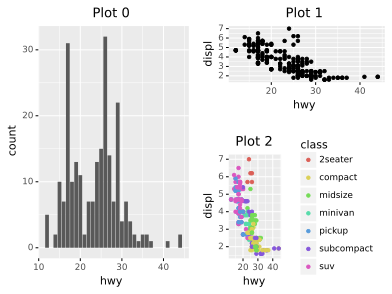

In [23]:
vis_left = cow.patch(g1,g2) + cow.layout(ncol =1, rel_heights = [2,3])
vis_total = cow.patch(g0, vis_left) + cow.layout(nrow = 1)

vis_total.show(width = 1.2, height = .9)

#### Avoiding sizing correction

If you want to throw an error when you request a size that is not ability to be delivered (as opposed to the default approach of overriding your request), you can change the global `rcParams`'s `num_attempts`. Specifically, by setting `cow.rcParams["num_attempts"] = 1` you'll observe an error thrown if you define an unobtainable size.

In [26]:
import pytest
cow.rcParams["num_attempts"] = 1

with pytest.raises(Exception) as e_info:
    vis_total.show(width = 1.2, height = .9)
print(e_info)
    
# setting the parameter back
cow.rcParams["num_attempts"] = 2 # current default

<ExceptionInfo StopIteration('Attempts to find the correct sizing of innerplots failed with provided parameters') tblen=3>
